# Abortion study EU datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [3]:
# Load the datasets

eu_1 = pd.read_csv('eu_ab_1.csv')
eu_2 = pd.read_csv('eu_ab_2.csv')
eu_pop = pd.read_csv('eu_population_count.csv')
eu_births = pd.read_csv('eu_live_births.csv')
eu_births_by_age = pd.read_csv('eu_births_by_age.csv')

eu_1 = eu_1[(eu_1['geo'] != 'Germany including former GDR') & (eu_1['geo'] != 'Metropolitan France')]
eu_pop = eu_pop[(eu_pop['geo'] != 'Germany including former GDR') & (eu_1['geo'] != 'Metropolitan France')]

print(eu_1.isnull().sum())
print(eu_2.isnull().sum())

DATAFLOW          0
LAST UPDATE       0
freq              0
unit              0
age               0
geo               0
TIME_PERIOD       0
OBS_VALUE         0
OBS_FLAG       7540
CONF_STATUS    7595
dtype: int64
DATAFLOW         0
LAST UPDATE      0
freq             0
indic_de         0
unit             0
geo              0
TIME_PERIOD      0
OBS_VALUE        0
OBS_FLAG       497
CONF_STATUS    502
dtype: int64


C:\Users\Tudor\AppData\Local\Temp\ipykernel_9228\79747375.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eu_pop = eu_pop[(eu_pop['geo'] != 'Germany including former GDR') & (eu_1['geo'] != 'Metropolitan France')]


In [4]:
eu_1.describe()

,TIME_PERIOD,OBS_VALUE,CONF_STATUS
count,7595.000000,7.595000e+03,0.0
mean,2004.618565,1.589860e+04,NaN
std,12.723524,5.593180e+04,NaN
min,1960.000000,0.000000e+00,NaN
25%,1998.000000,1.200000e+02,NaN
50%,2006.000000,1.771000e+03,NaN
75%,2014.000000,1.046700e+04,NaN
max,2023.000000,1.407042e+06,NaN


### Q1: How have abortion rates changed over time across EU countries?

In [5]:
abortions_by_year = eu_1[eu_1['age'] == 'Total'].groupby('TIME_PERIOD').OBS_VALUE.sum().reset_index()
abortions_by_year.columns = ['Year', 'Total Abortions']
abortions_by_year

,Year,Total Abortions
0,1960,1394005.0
1,1961,448654.0
2,1962,364640.0
3,1963,361941.0
4,1964,385124.0
...,...,...
59,2019,523981.0
60,2020,762567.0
61,2021,634463.0
62,2022,655626.0


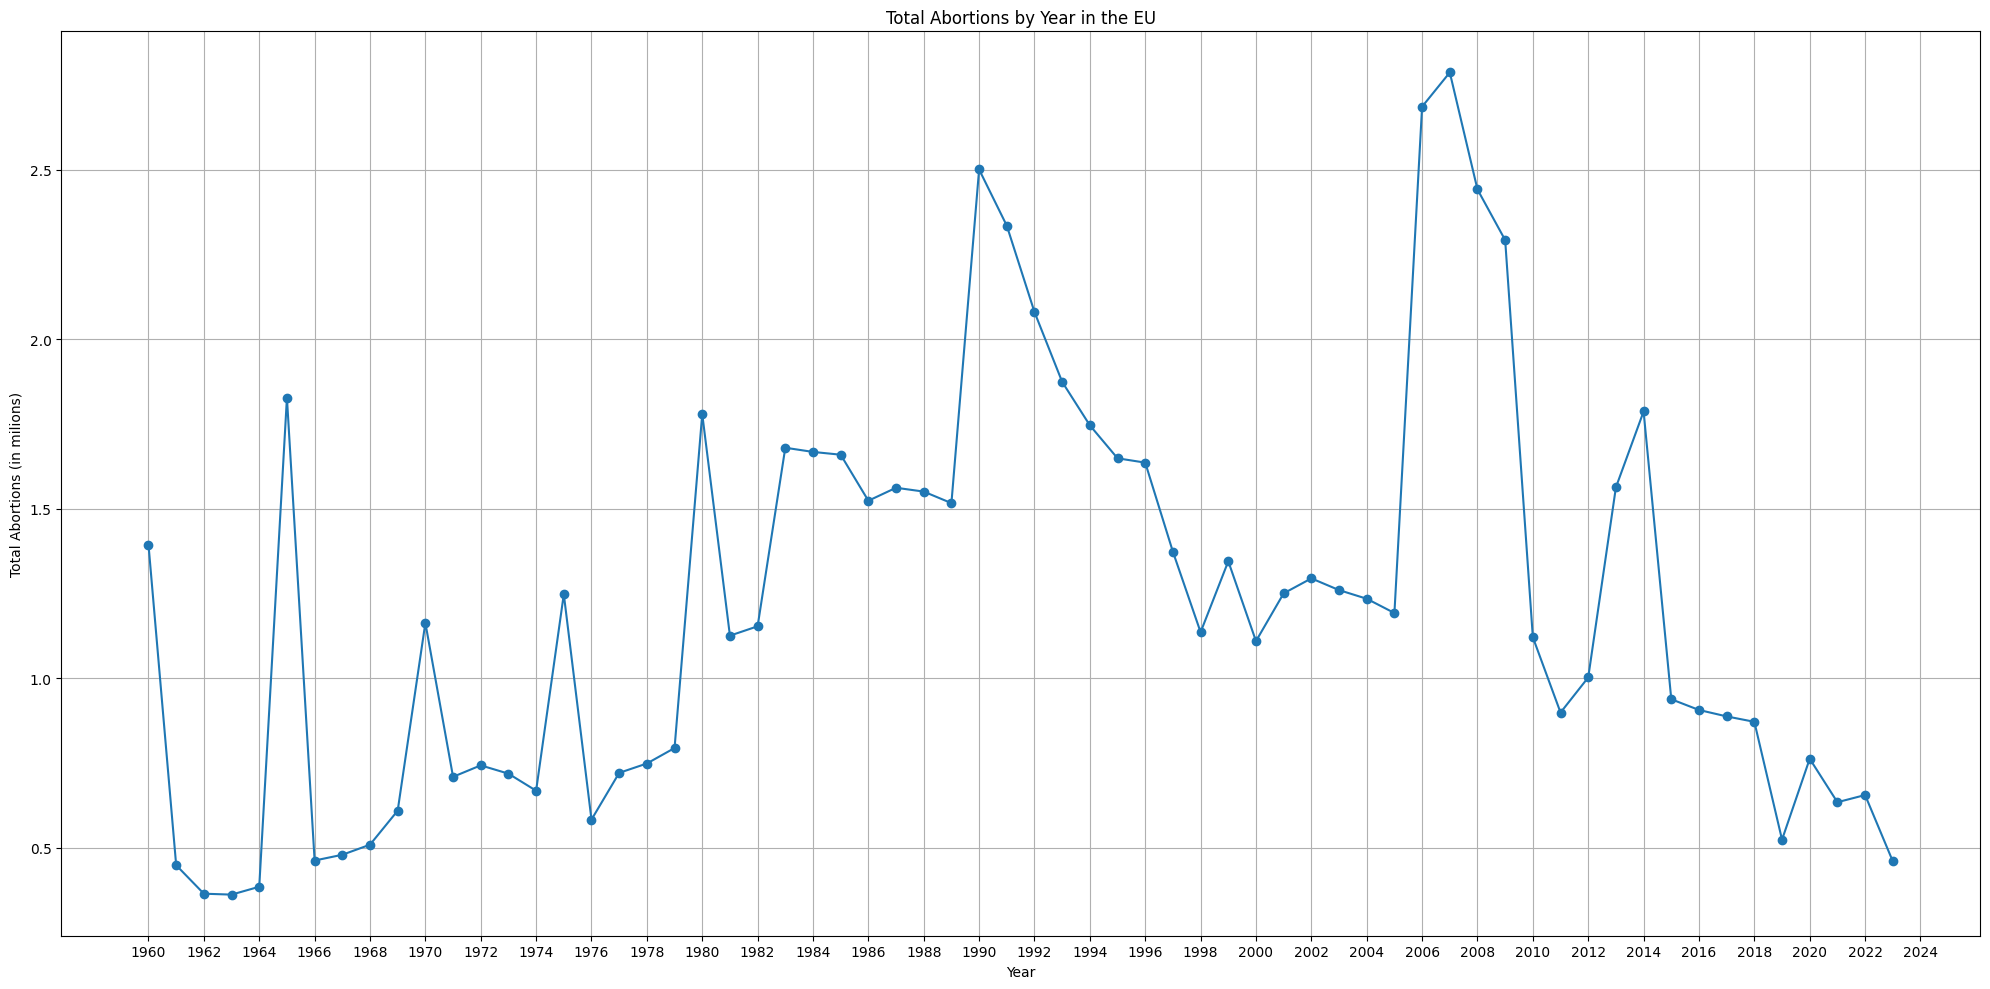

In [6]:
plt.figure(figsize=(20, 10))
plt.title('Total Abortions by Year in the EU')
plt.xlabel('Year')
plt.ylabel('Total Abortions (in milions)')
plt.plot(abortions_by_year.Year, abortions_by_year['Total Abortions']/ 1_000_000, marker='o')
plt.tight_layout()
plt.grid(True)

years = abortions_by_year['Year']
plt.xticks(np.arange(years.min(), years.max() + 2, 2))
plt.show()

It seemes that somthing might of happened right before 2010 where we had a big rise and than a fall of the abortion numbers per year <br>
Maybe visialising every country in the eu might help us understand this better.

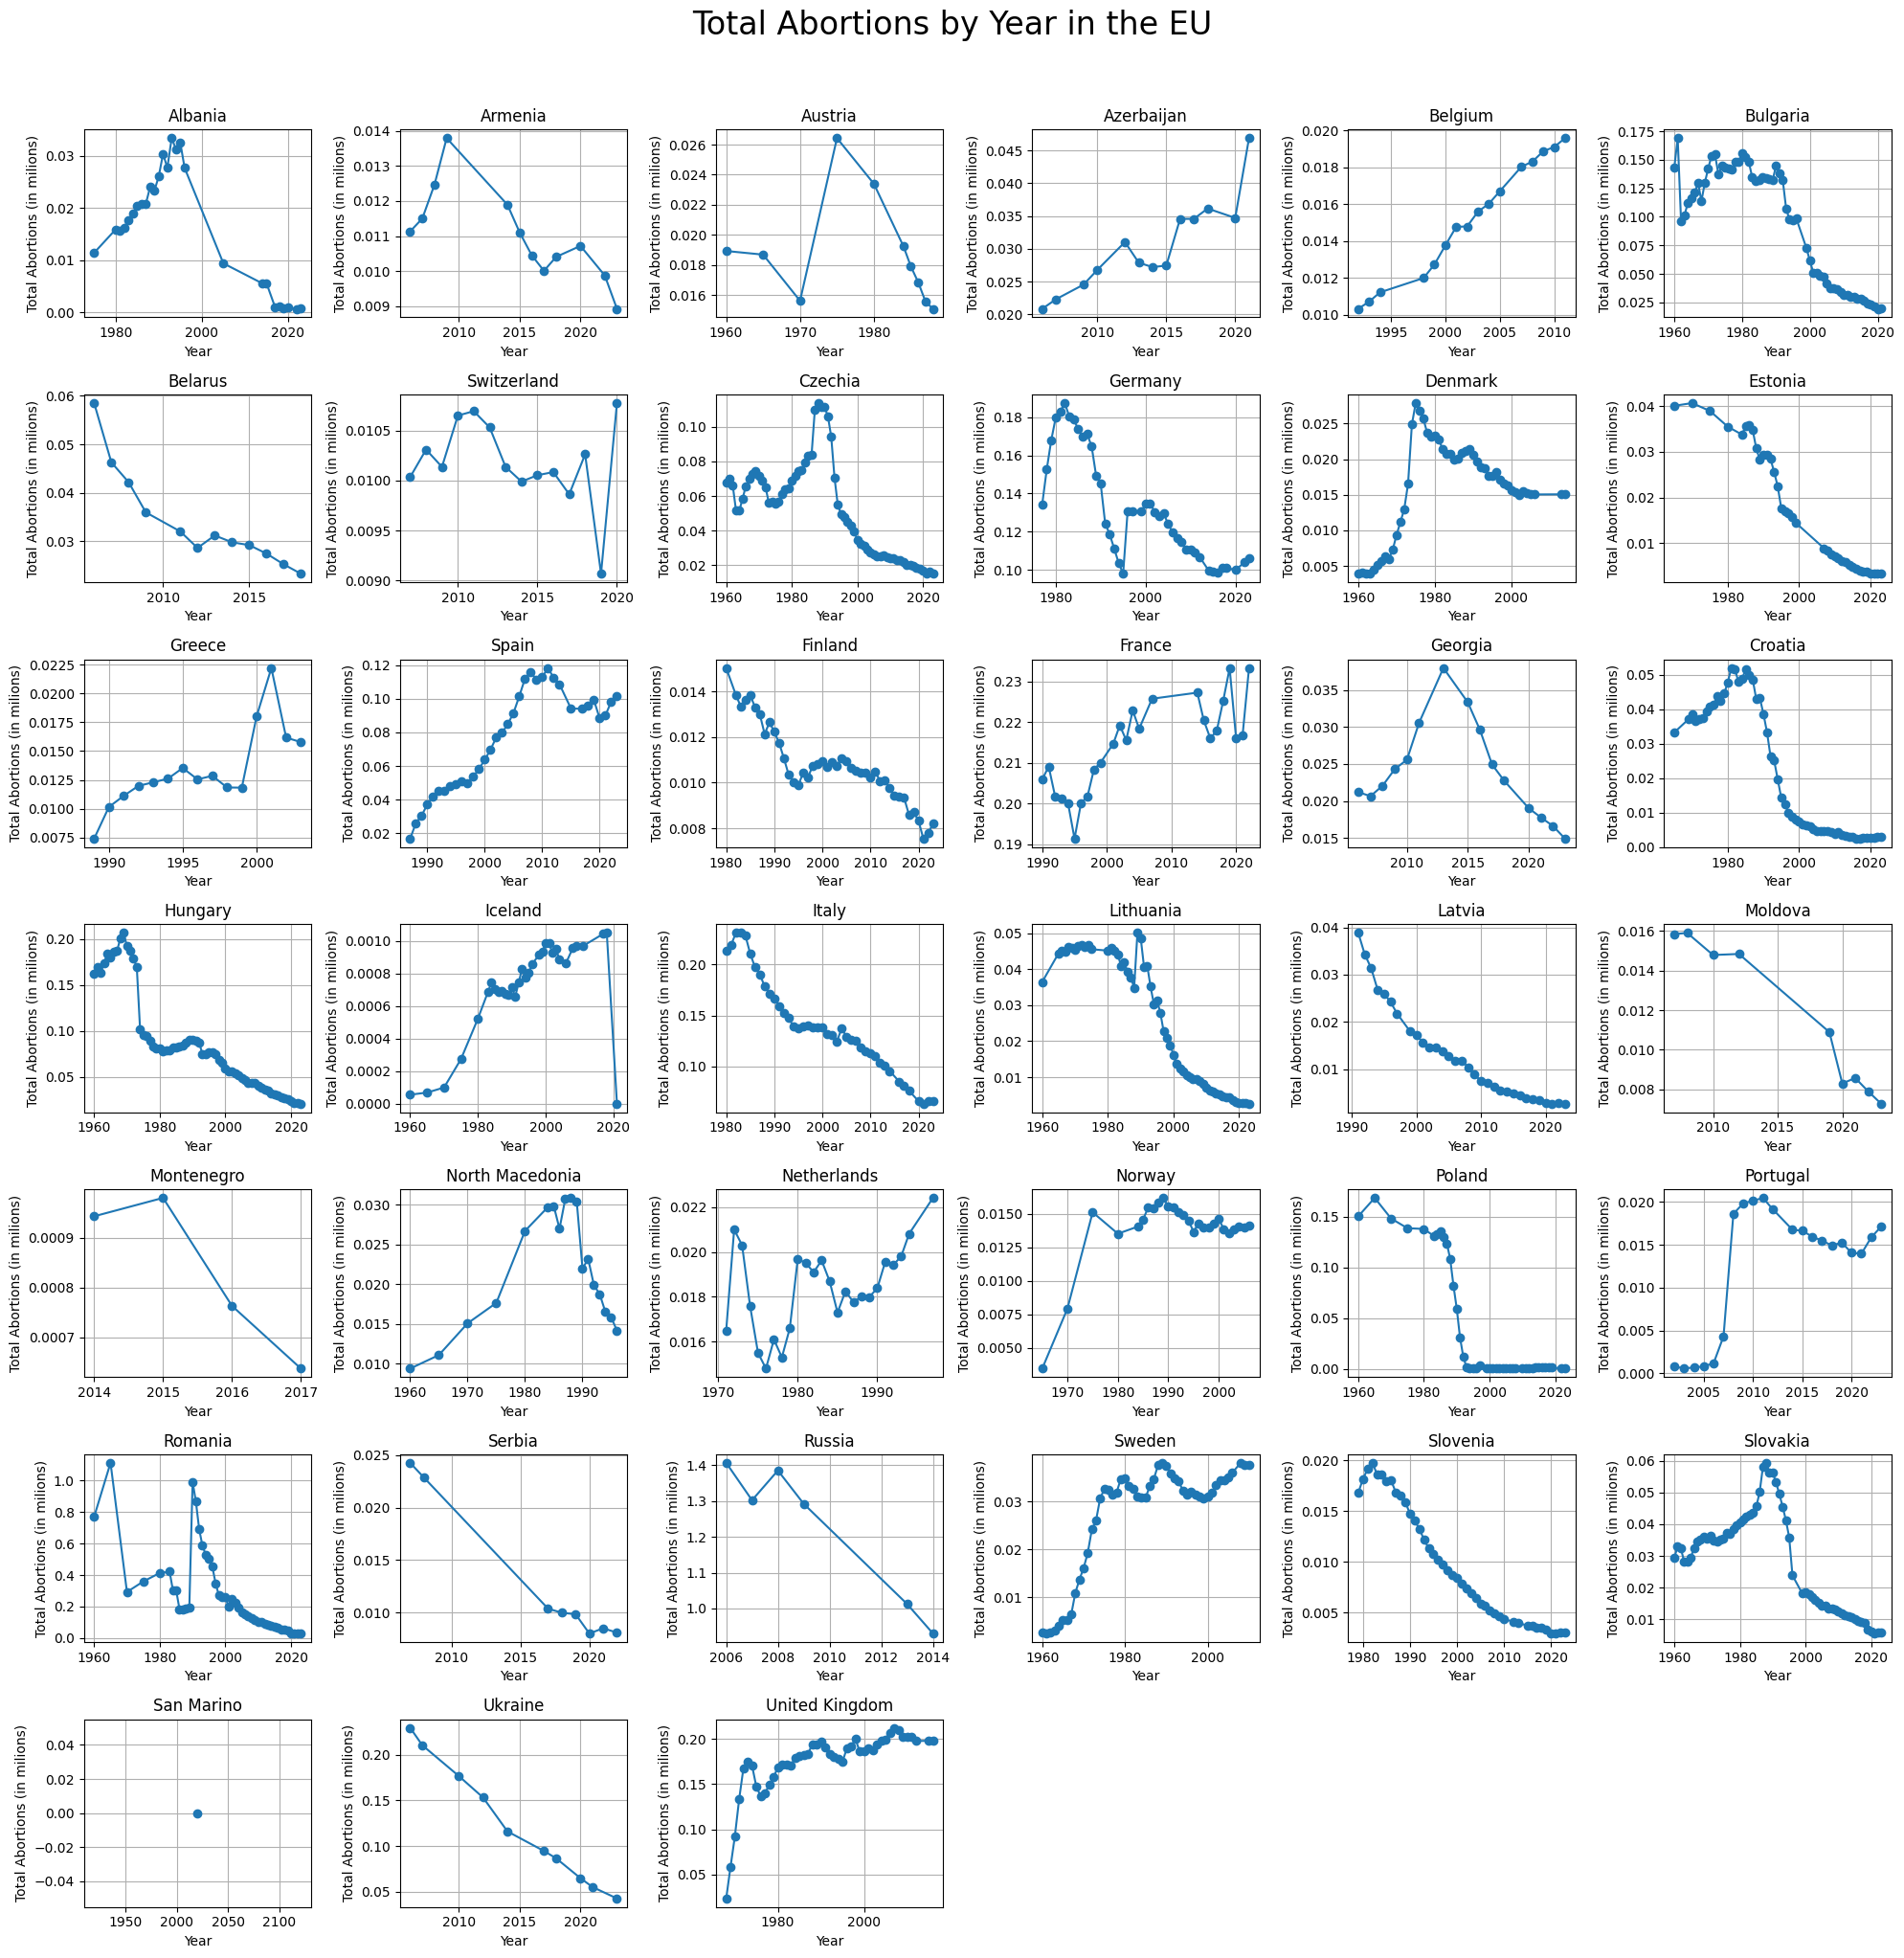

In [7]:
plt.figure(figsize=(20, 20))

index = 1
for location in eu_1.geo.unique():
    abortions_per_country_by_year = eu_1[(eu_1['geo'] == location) & (eu_1['age'] == 'Total')].groupby('TIME_PERIOD').OBS_VALUE.sum().reset_index()
    abortions_per_country_by_year.columns = ['Year', 'Total Abortions']

    plt.subplot(7, 6, index)
    index += 1
    plt.title(location)
    plt.xlabel('Year')
    plt.ylabel('Total Abortions (in milions)')
    plt.plot(abortions_per_country_by_year.Year, abortions_per_country_by_year['Total Abortions']/ 1_000_000, marker='o')
    plt.grid(True)

plt.suptitle('Total Abortions by Year in the EU', fontsize=24, y=1.02)
plt.tight_layout()
plt.show()

Not all contries seem to have a noticible raise in abortions in 2007.

But let's take only Romania:

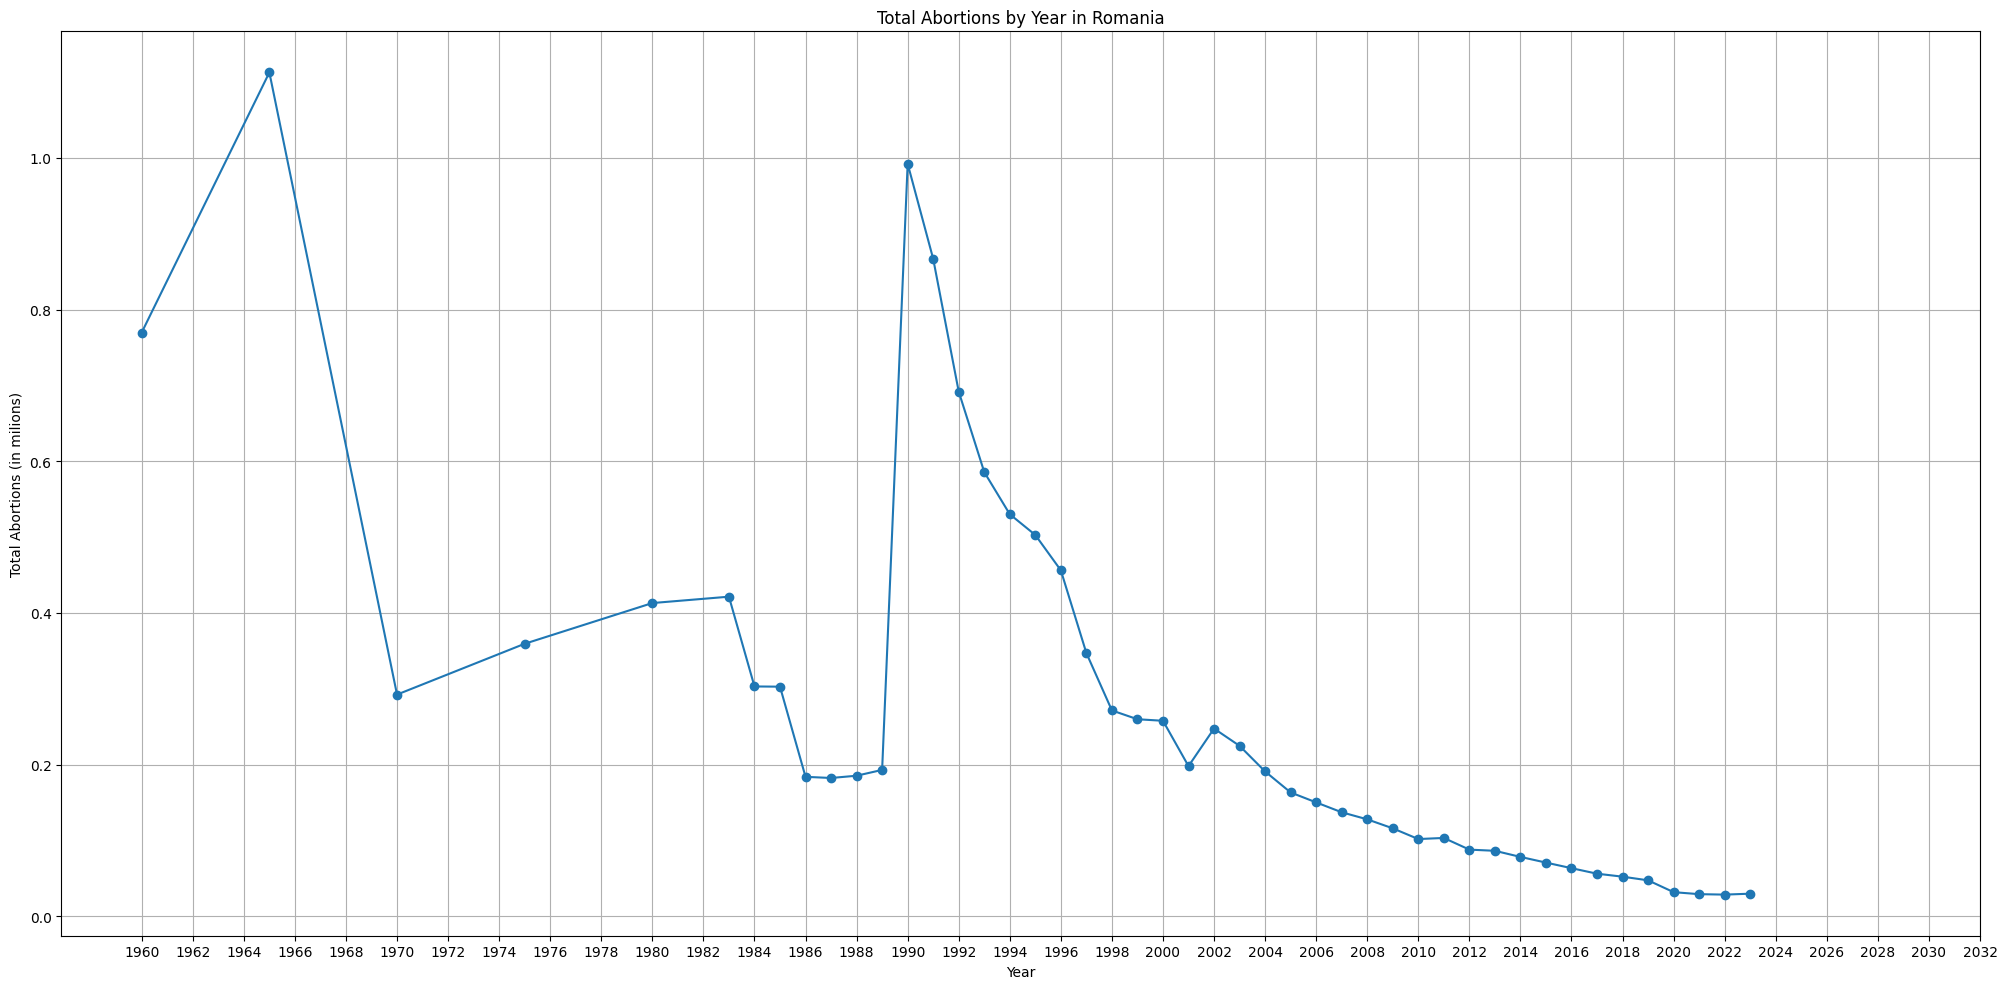

In [8]:
abortions_romania = eu_1[(eu_1['geo'] == 'Romania') & (eu_1['age'] == 'Total')]

plt.figure(figsize=(20, 10))
plt.title('Total Abortions by Year in Romania')
plt.xlabel('Year')
plt.ylabel('Total Abortions (in milions)')
plt.plot(abortions_romania.TIME_PERIOD, abortions_romania['OBS_VALUE']/ 1_000_000, marker='o')
plt.tight_layout()
plt.grid(True)

years = abortions_romania['TIME_PERIOD']
plt.xticks(np.arange(years.min(), years.max() + 10, 2))
plt.show()

The decline after 1966 happened because abortion was made iligal in Romania, <br>
While the rise in 1990 happened because it was made legal again.

### Q2: Rank EU countires in terms of avort numbers.

we'll only take 2023 in consideration

In [9]:
eu_1.groupby('TIME_PERIOD')['geo'].nunique().sort_values(ascending=False)

TIME_PERIOD
2007    28
2017    27
2006    27
2008    27
1992    26
        ..
1966     7
1961     6
1964     6
1963     6
1962     6
Name: geo, Length: 64, dtype: int64

In [10]:
eu_2.groupby('TIME_PERIOD')['geo'].nunique().sort_values(ascending=False).head(10)

TIME_PERIOD
2017    28
2018    27
2014    26
2015    25
2020    25
2016    24
2019    24
2022    22
2013    21
2023    20
Name: geo, dtype: int64

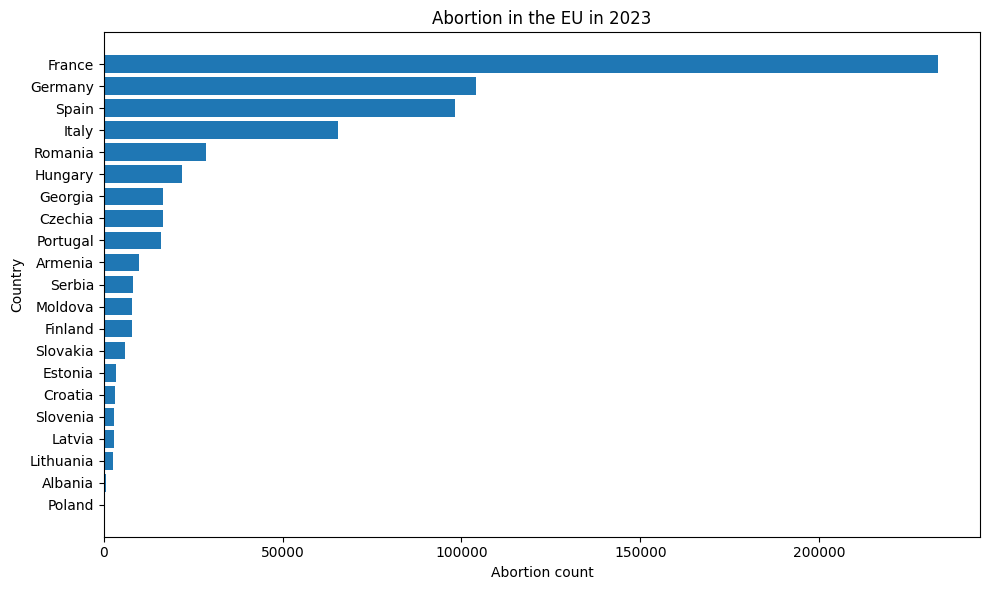

In [11]:
abortions2023 = eu_1[(eu_1['TIME_PERIOD'] == 2022) & (eu_1['age'] == 'Total')]
abortions2023 = abortions2023.groupby('geo')['OBS_VALUE'].sum().reset_index()
abortions2023.sort_values(by='OBS_VALUE', inplace=True, ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(y=abortions2023.geo, width=abortions2023.OBS_VALUE)
plt.title('Abortion in the EU in 2023')
plt.xlabel('Abortion count')
plt.ylabel('Country')
plt.tight_layout()

Intresting resuls, but I think we'd get a better understanding if instead of only abortions, we'd visualise abortions per population for every country

In [12]:
population2023 = eu_pop[eu_pop['TIME_PERIOD'] == 2022][['geo', 'OBS_VALUE']]
population2023.sort_values(by='OBS_VALUE', inplace=True)
population2023.head(3)

,geo,OBS_VALUE
543,San Marino,33698
333,Liechtenstein,39308
5,Andorra,79535


First let's visualise the population for each country

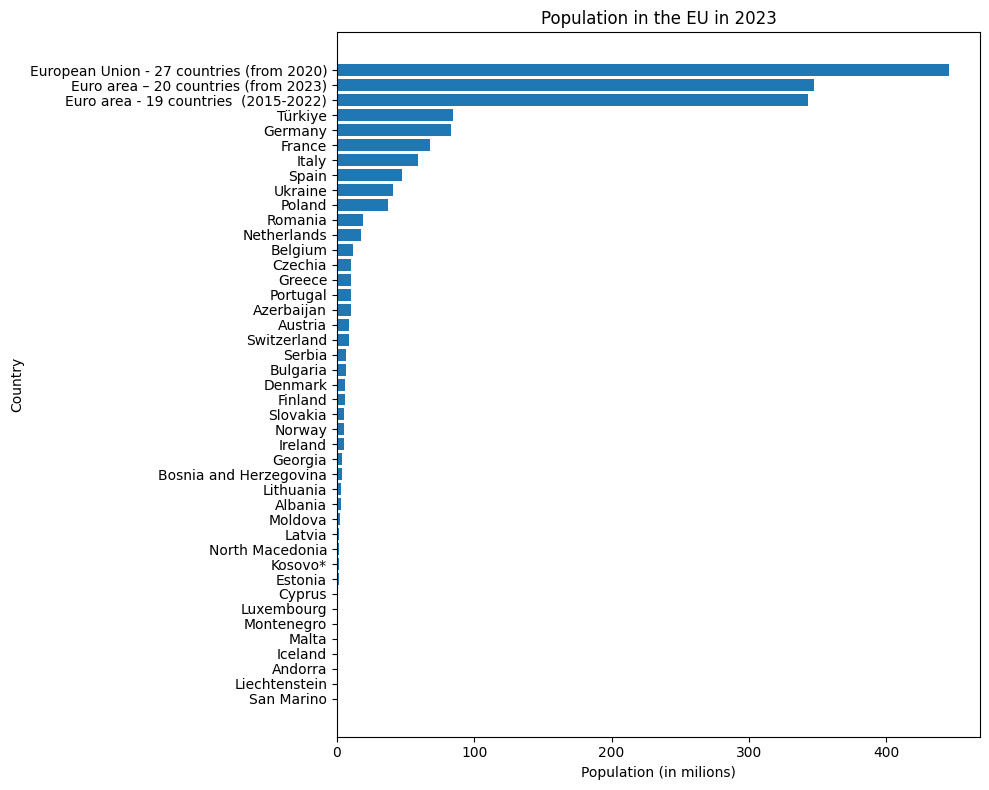

In [13]:
plt.figure(figsize=(10, 8))
plt.barh(y=population2023.geo, width=population2023.OBS_VALUE/ 1_000_000)
plt.title('Population in the EU in 2023')
plt.xlabel('Population (in milions)')
plt.ylabel('Country')
plt.tight_layout()

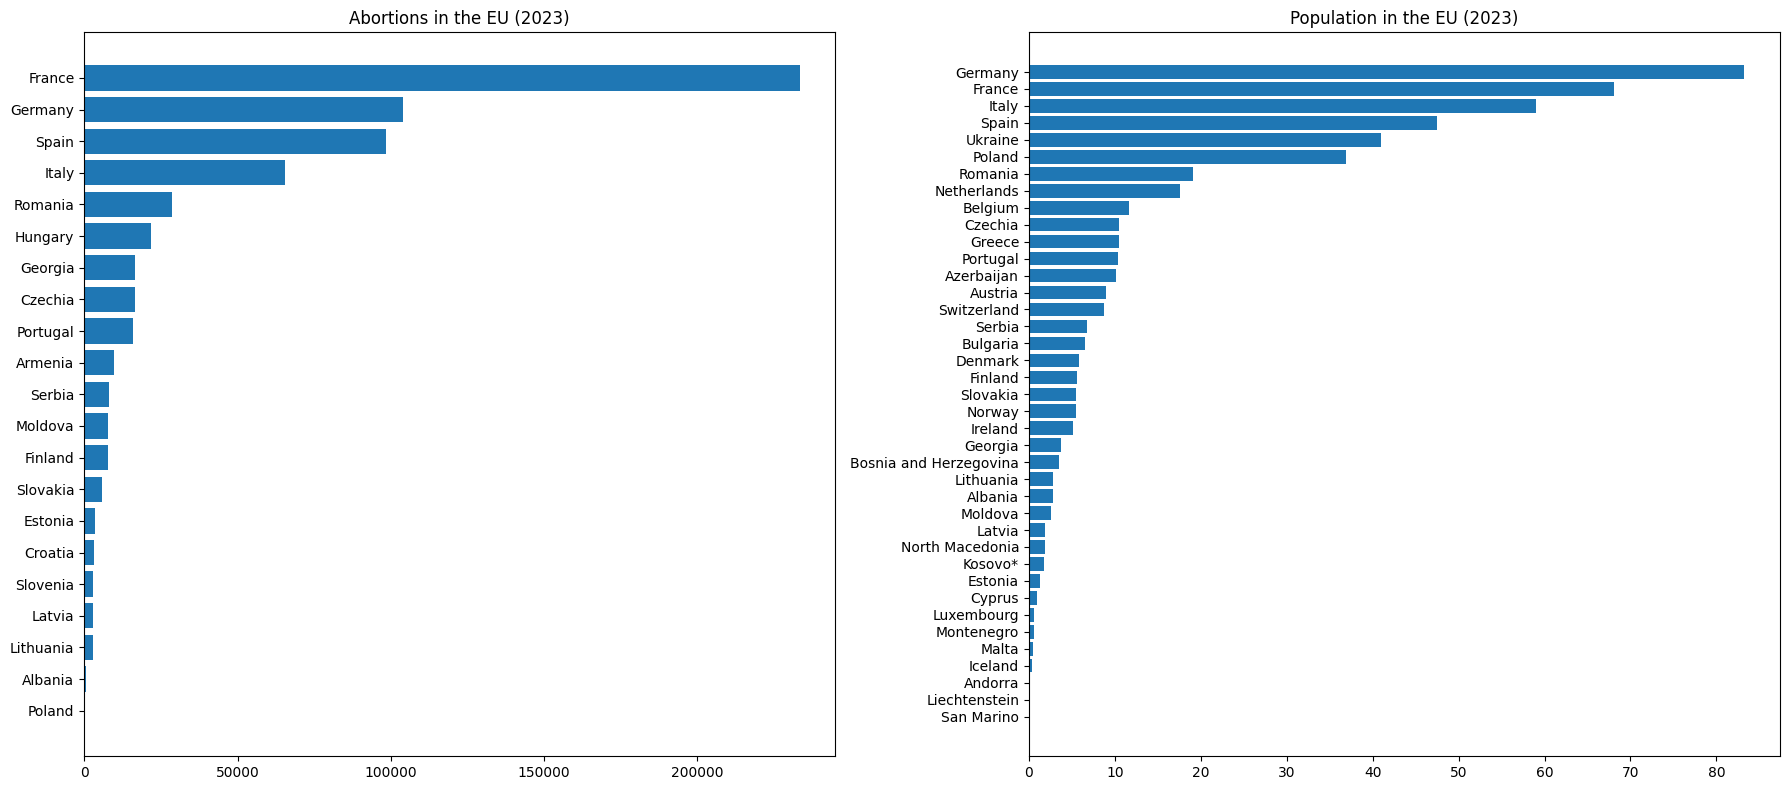

In [30]:
plt.figure(figsize=(18, 8))

population2023 = population2023[(~population2023.geo.str.contains('Euro')) & (population2023.geo != 'Türkiye')]

plt.subplot(1, 2, 1)
plt.barh(abortions2023.geo, abortions2023.OBS_VALUE)
plt.title("Abortions in the EU (2023)")

plt.subplot(1, 2, 2)
plt.barh(population2023.geo, population2023.OBS_VALUE / 1_000_000)
plt.title("Population in the EU (2023)")

plt.tight_layout()
plt.show()

We can see in the two plots above that population seems to be a big factor when talking about abortion, contries with a big population will have a big number of abortions, this seems to be the trend. But there are exceptions, usually estern European cuntries such as Georgia and Moldova. <br>
Maybe looking at the percentages will give us a better idea of what is happening.

Interesting we see that even tho Poland has a bigger Population it has more abortions

In [15]:
abort_per_pop2023 = pd.merge(abortions2023, population2023, on='geo', how='inner')
abort_per_pop2023['OBS_VALUE'] = (abort_per_pop2023['OBS_VALUE_x'] / abort_per_pop2023['OBS_VALUE_y']) * 1_00
abort_per_pop2023.sort_values(by='OBS_VALUE', inplace=True)
abort_per_pop2023

,geo,OBS_VALUE_x,OBS_VALUE_y,OBS_VALUE
0,Poland,160.0,36889761,0.000434
1,Albania,676.0,2793592,0.024198
2,Lithuania,2705.0,2805998,0.096401
5,Slovakia,5891.0,5434712,0.108396
13,Italy,65449.0,59030133,0.110874
8,Serbia,8090.0,6797105,0.119021
15,Germany,103927.0,83237124,0.124857
6,Finland,7782.0,5548241,0.140261
3,Latvia,2793.0,1875757,0.148900
12,Romania,28661.0,19042455,0.150511


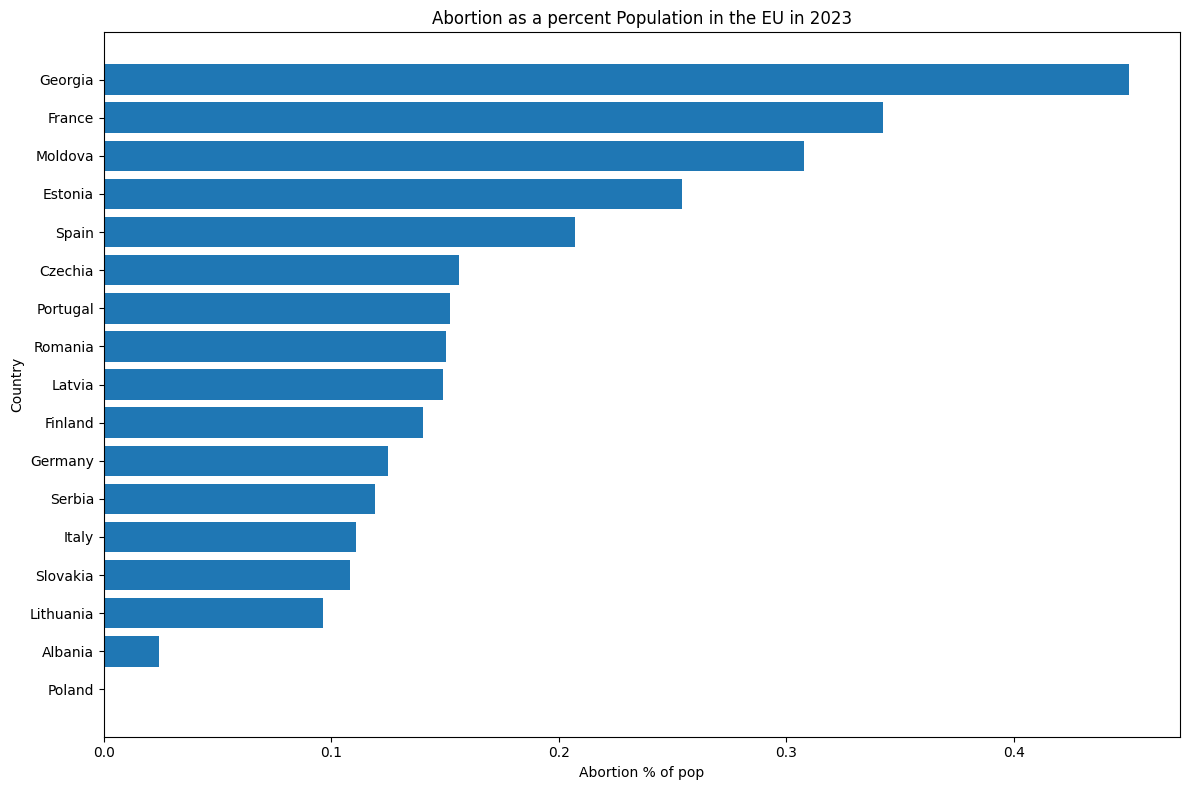

In [16]:
plt.figure(figsize=(12, 8))
plt.barh(y=abort_per_pop2023.geo, width=abort_per_pop2023.OBS_VALUE)
plt.title('Abortion as a percent Population in the EU in 2023')
plt.xlabel('Abortion % of pop')
plt.ylabel('Country')
plt.tight_layout()

Weird, maybe when we'll talk about natalities we will understand this graph better.

## Q3: How do demographics like age and region affect abortion and natality rates?

### Okay now let's see how age influences abortions

In [17]:
abortions_by_age = eu_1[eu_1['TIME_PERIOD'] == 2022].groupby('age').OBS_VALUE.sum().reset_index()
abortions_by_age.sort_values(by='OBS_VALUE', inplace=True)
abortions_by_age

,age,OBS_VALUE
0,50 years or over,241.0
8,Less than 15 years,1589.0
10,Unknown,1953.0
7,From 45 to 49 years,4084.0
6,From 40 to 44 years,50376.0
1,From 15 to 19 years,51377.0
5,From 35 to 39 years,115562.0
2,From 20 to 24 years,129504.0
3,From 25 to 29 years,141271.0
4,From 30 to 34 years,148820.0


In [18]:
abortions_by_age.drop(9, inplace=True)  # drop toal abortion
abortions_by_age.drop(10, inplace=True) # drop Unknown 

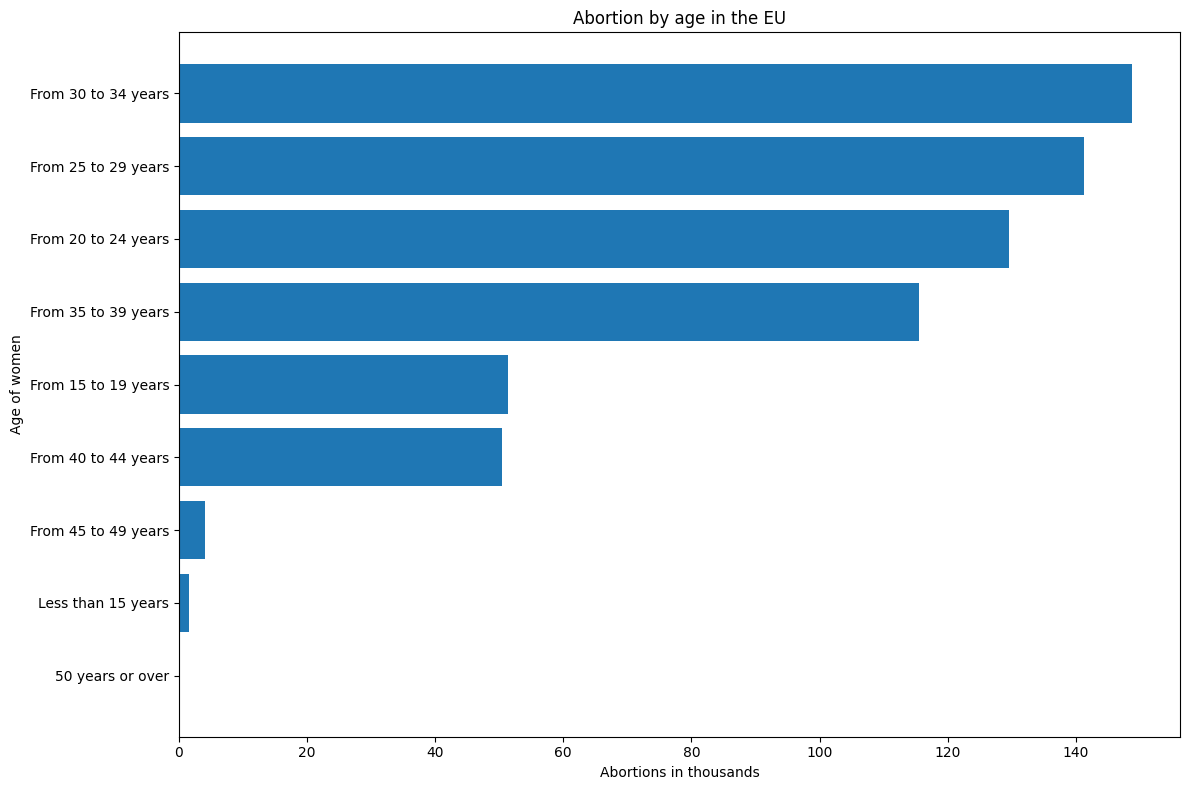

In [19]:
plt.figure(figsize=(12, 8))
plt.barh(y=abortions_by_age.age, width=abortions_by_age.OBS_VALUE / 1_000)
plt.title('Abortion by age in the EU')
plt.xlabel('Abortions in thousands')
plt.ylabel('Age of women')
plt.tight_layout()

Let's take only romania

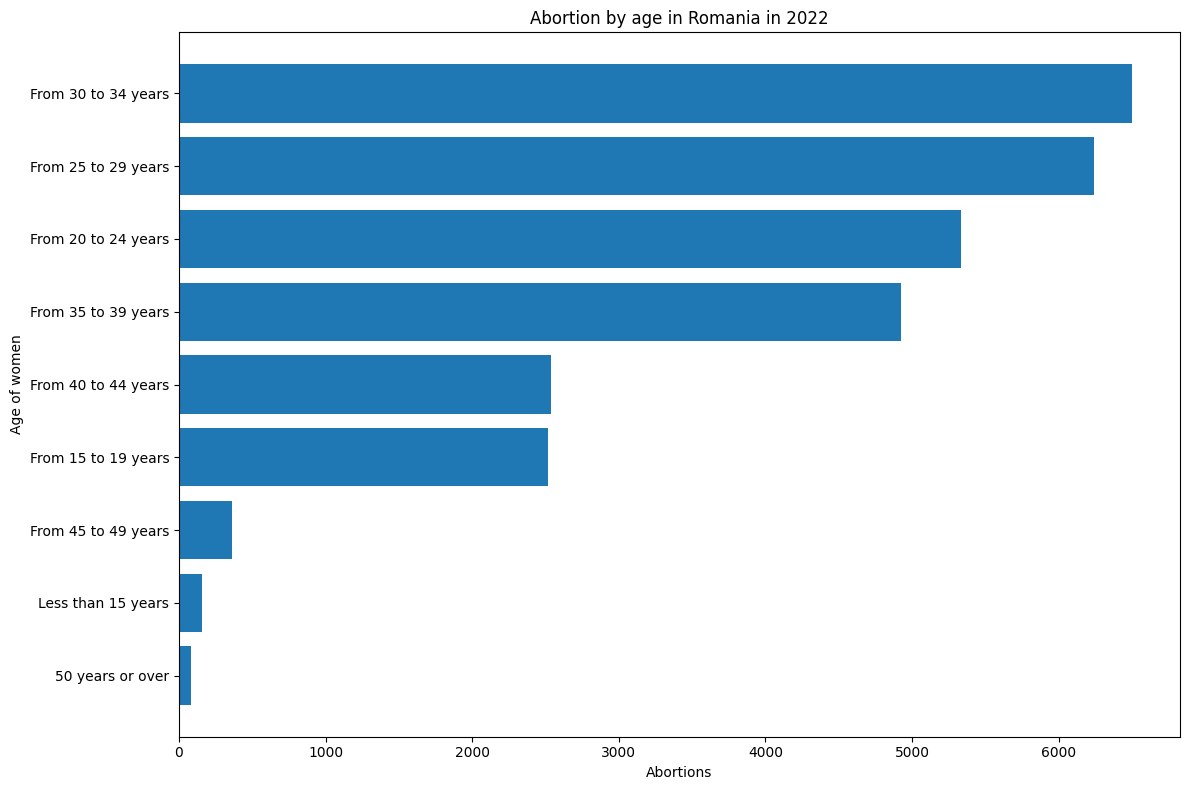

In [20]:
abortions_by_age_Romania = eu_1[(eu_1['TIME_PERIOD'] == 2022) & (eu_1['geo'] == 'Romania')].groupby('age').OBS_VALUE.sum().reset_index()
abortions_by_age_Romania.sort_values(by='OBS_VALUE', inplace=True)

# abortions_by_age_Romania.drop(9, inplace=True)  # drop toal abortion
# abortions_by_age_Romania.drop(10, inplace=True) # drop Unknown 
abortions_by_age_Romania = abortions_by_age_Romania[
    ~abortions_by_age_Romania['age'].isin(['Total', 'Unknown'])
]


plt.figure(figsize=(12, 8))
plt.barh(y=abortions_by_age_Romania.age, width=abortions_by_age_Romania.OBS_VALUE)
plt.title('Abortion by age in Romania in 2022')
plt.xlabel('Abortions')
plt.ylabel('Age of women')
plt.tight_layout()

First question that I have, did this change over the time?

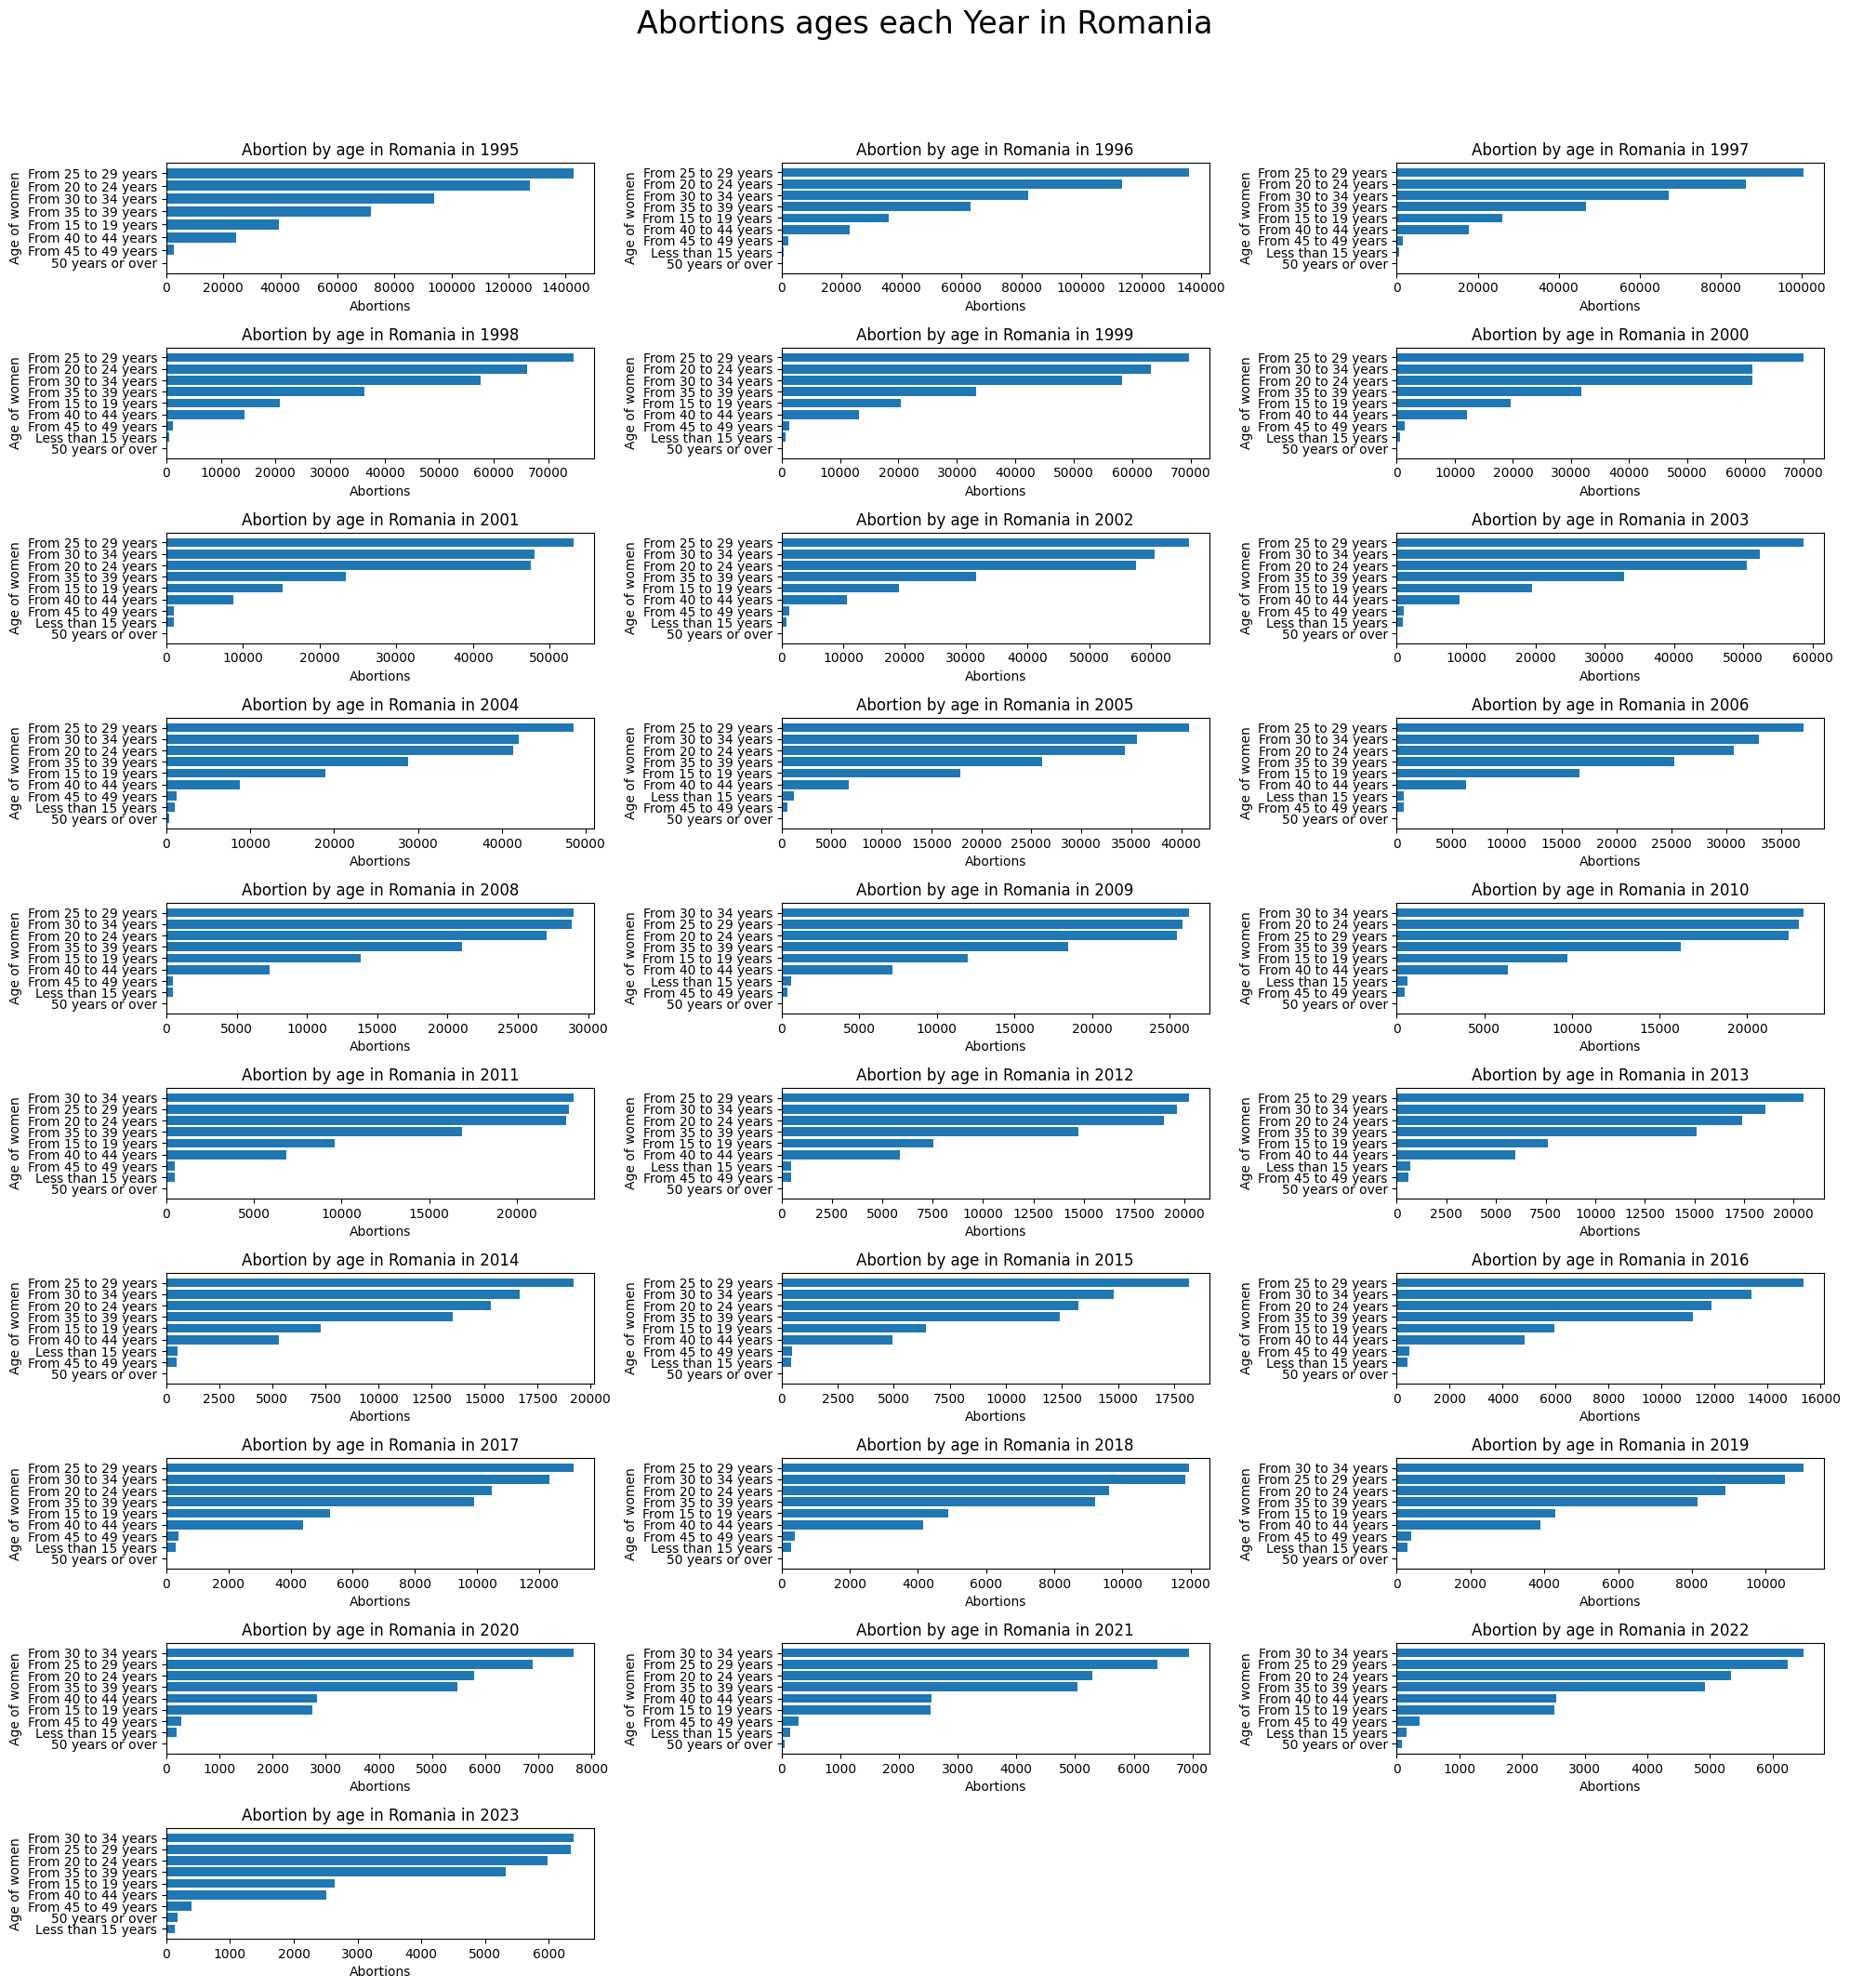

In [21]:
plt.figure(figsize=(20, 40))

index = 1
years = eu_1.TIME_PERIOD.unique()
years.sort()
for year in years:

    abortions_by_age_Romania = eu_1[(eu_1['TIME_PERIOD'] == year) & (eu_1['geo'] == 'Romania')].groupby('age').OBS_VALUE.sum().reset_index()
    abortions_by_age_Romania.sort_values(by='OBS_VALUE', inplace=True)

    abortions_by_age_Romania = abortions_by_age_Romania[
        ~abortions_by_age_Romania['age'].isin(['Total', 'Unknown'])
    ]

    if abortions_by_age_Romania.empty:
        continue

    plt.subplot(20, 3, index)
    index += 1

    plt.barh(y=abortions_by_age_Romania.age, width=abortions_by_age_Romania.OBS_VALUE)
    plt.title(f'Abortion by age in Romania in {year}')
    plt.xlabel('Abortions')
    plt.ylabel('Age of women')
    plt.tight_layout()

plt.suptitle('Abortions ages each Year in Romania', fontsize=24, y=1.02)
plt.tight_layout()
plt.show()

Alright this does not tell us a lot let's use a heatmap

In [22]:
age_order = [
    'Less than 15 years', 'From 15 to 19 years', 'From 20 to 24 years', 'From 25 to 29 years', 'From 30 to 34 years',
    'From 35 to 39 years', 'From 40 to 44 years', 'From 45 to 49 years', '50 years and over'
]

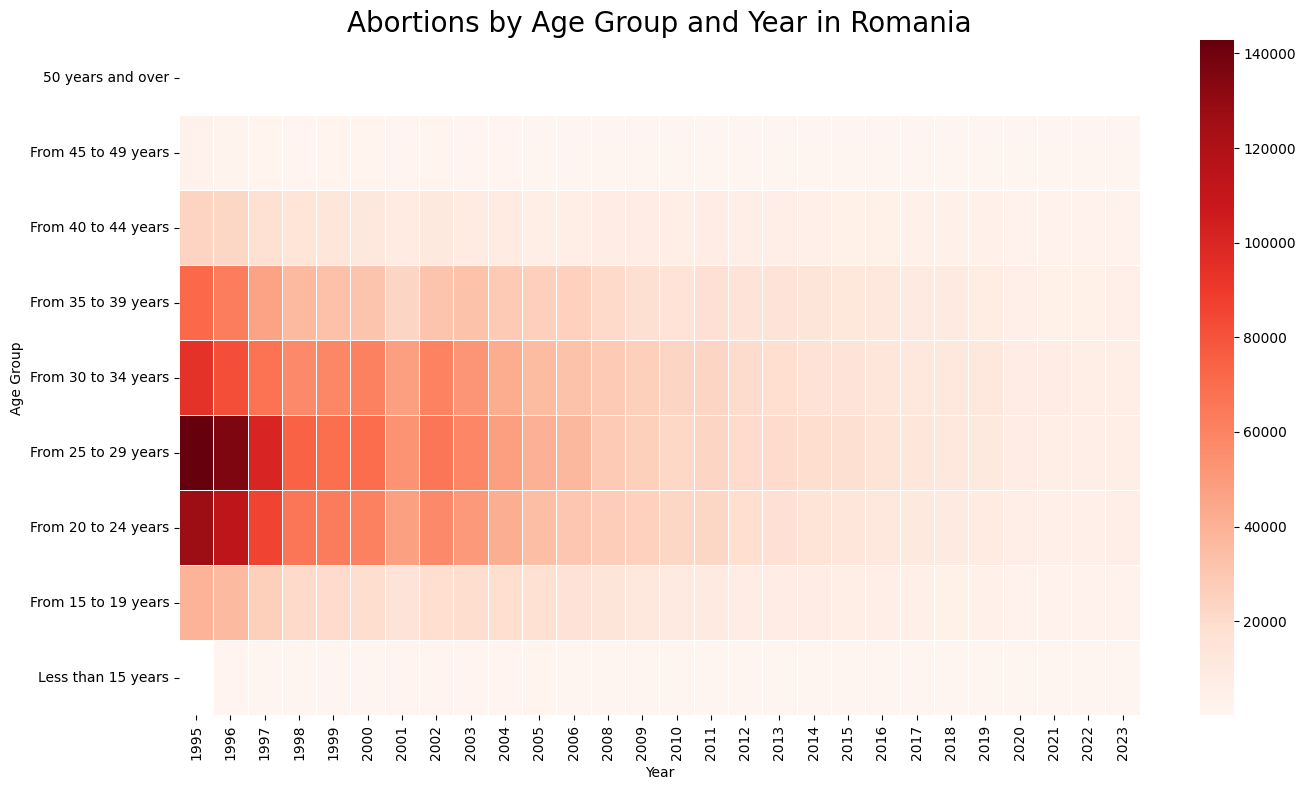

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

romania_ab = eu_1[eu_1['geo'] == 'Romania'].copy()
romania_ab = romania_ab[~romania_ab['age'].isin(['Total', 'Unknown'])]
heatmap_data = romania_ab.pivot_table(index='age', columns='TIME_PERIOD', values='OBS_VALUE', aggfunc='sum')
heatmap_data = heatmap_data.sort_index(axis=1)
heatmap_data = heatmap_data.reindex(age_order[::-1])

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='Reds', linewidths=0.5)
plt.title('Abortions by Age Group and Year in Romania', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


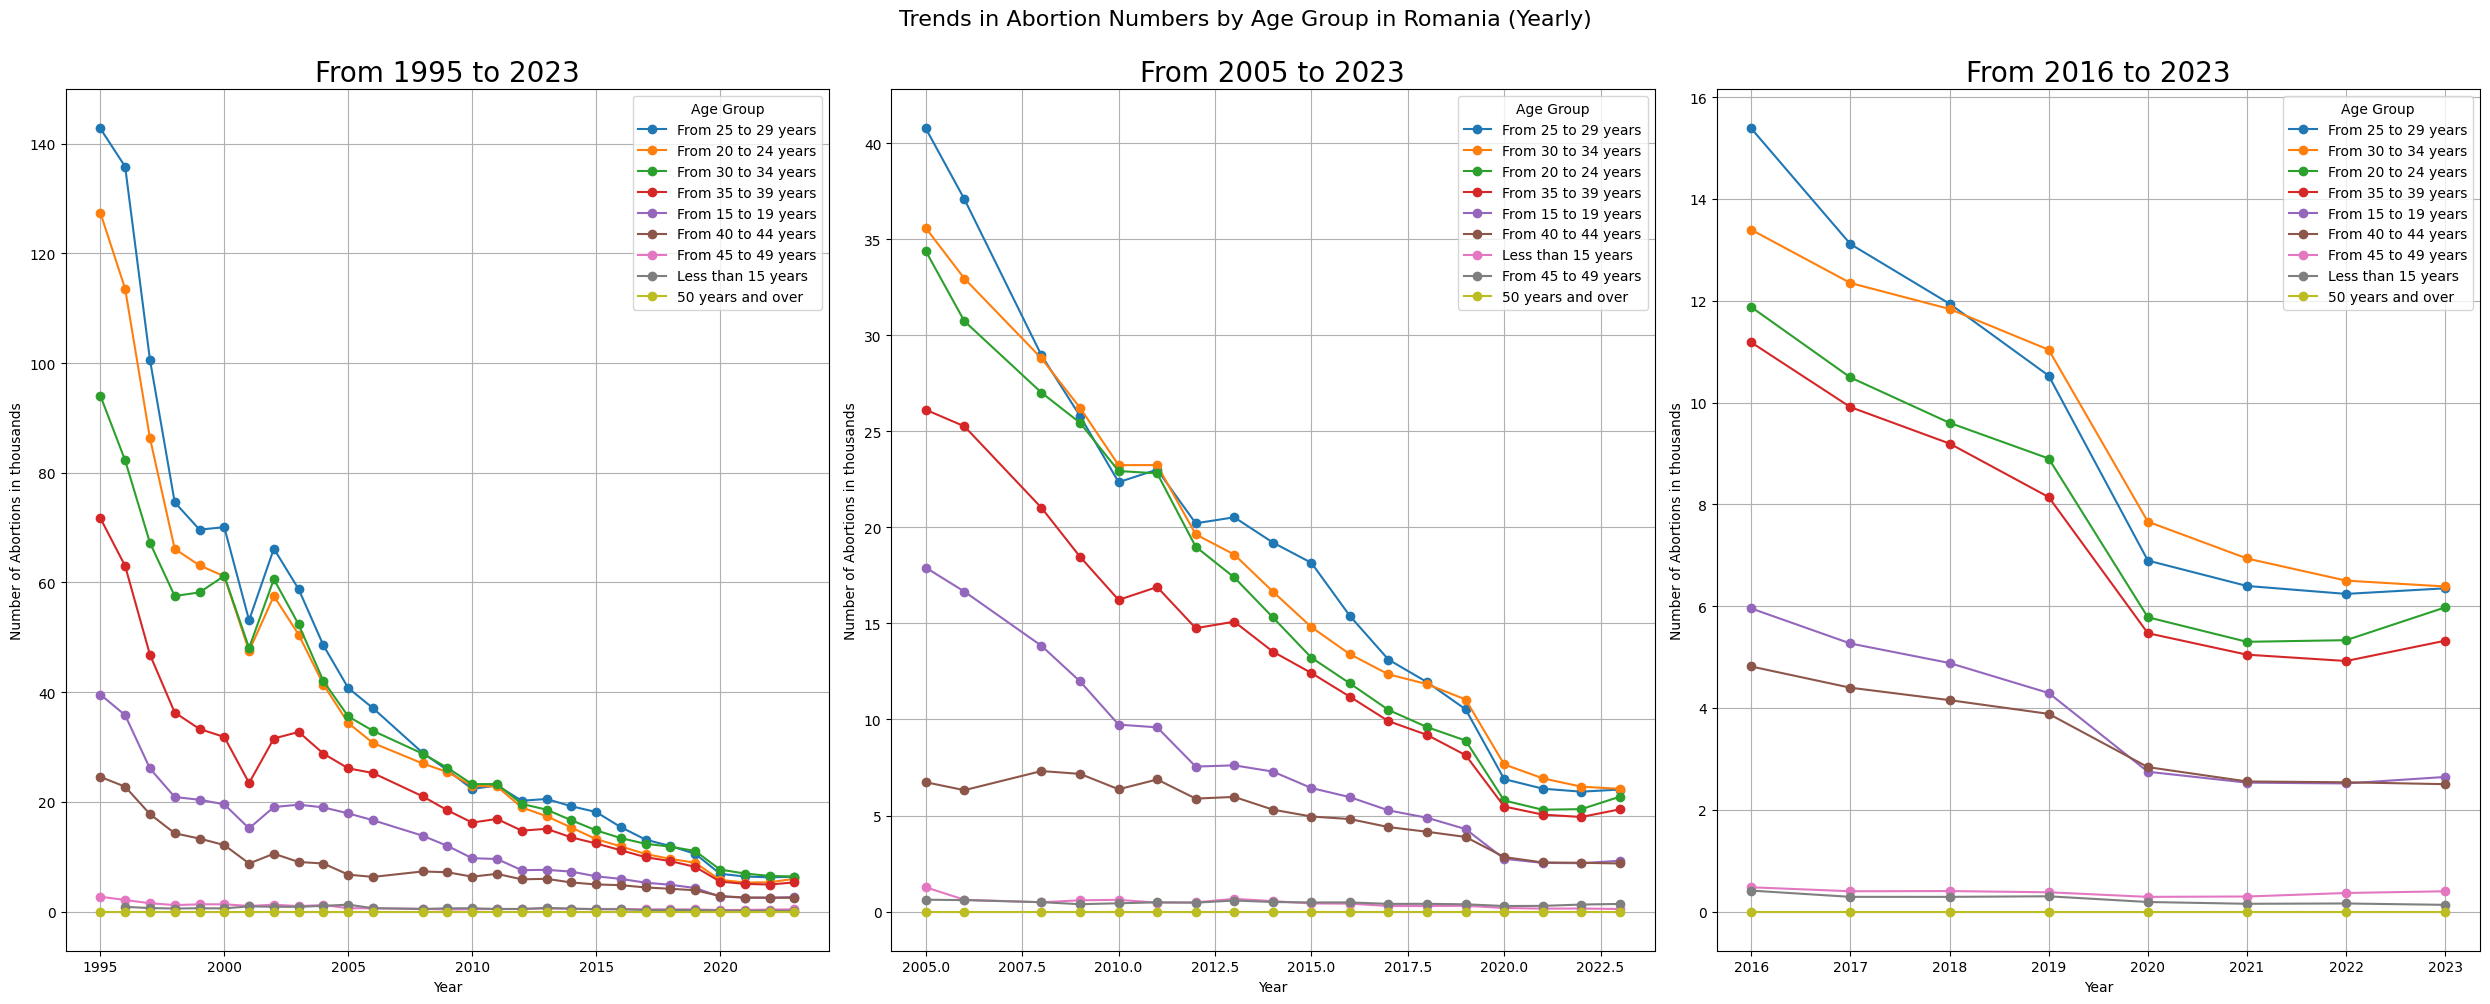

In [37]:
time_restriction = [1995, 2005, 2016]
index = 1
plt.figure(figsize=(25, 10))

for first_year in time_restriction:
    plt.subplot(1, 3, index)
    index += 1

    heatmap_data = romania_ab[romania_ab['TIME_PERIOD'] >= first_year].pivot_table(
        index='TIME_PERIOD', columns='age', values='OBS_VALUE', aggfunc='sum'
    )

    heatmap_data.index = heatmap_data.index.astype(int)
    heatmap_data = heatmap_data.sort_index()
    heatmap_data = heatmap_data.reindex(columns=age_order, fill_value=0)
    heatmap_data = heatmap_data[age_order]

    average_abortions = heatmap_data.mean().sort_values(ascending=False)
    sorted_age_order = average_abortions.index.tolist()

    for age_group in sorted_age_order:
        plt.plot(heatmap_data.index, heatmap_data[age_group] / 1_000, label=age_group, marker='o')

    plt.title(f'From {first_year} to 2023', fontsize=20)
    plt.xlabel('Year')
    plt.ylabel('Number of Abortions in thousands')
    plt.legend(title='Age Group')
    plt.grid(True)
    
plt.suptitle('Trends in Abortion Numbers by Age Group in Romania (Yearly)', fontsize=16, y=1)
plt.tight_layout() 
plt.show()

We can see a decreasing trend in the number of abortions in Romania, by most if not all age groups.

## Q4: Do major events or new legislation impact the number of abortions?

### 1.Romania

Abortion was legalized in Romania in 1957. However, the situation was complex, with the legalization being followed by a ban on abortion in 1966, according to an article in balcanicaucaso.org. The 1966 ban, Decree 770, was put in place to counter a decline in the birth rate. The ban was later lifted in 1989 after the fall of the communist regime. 

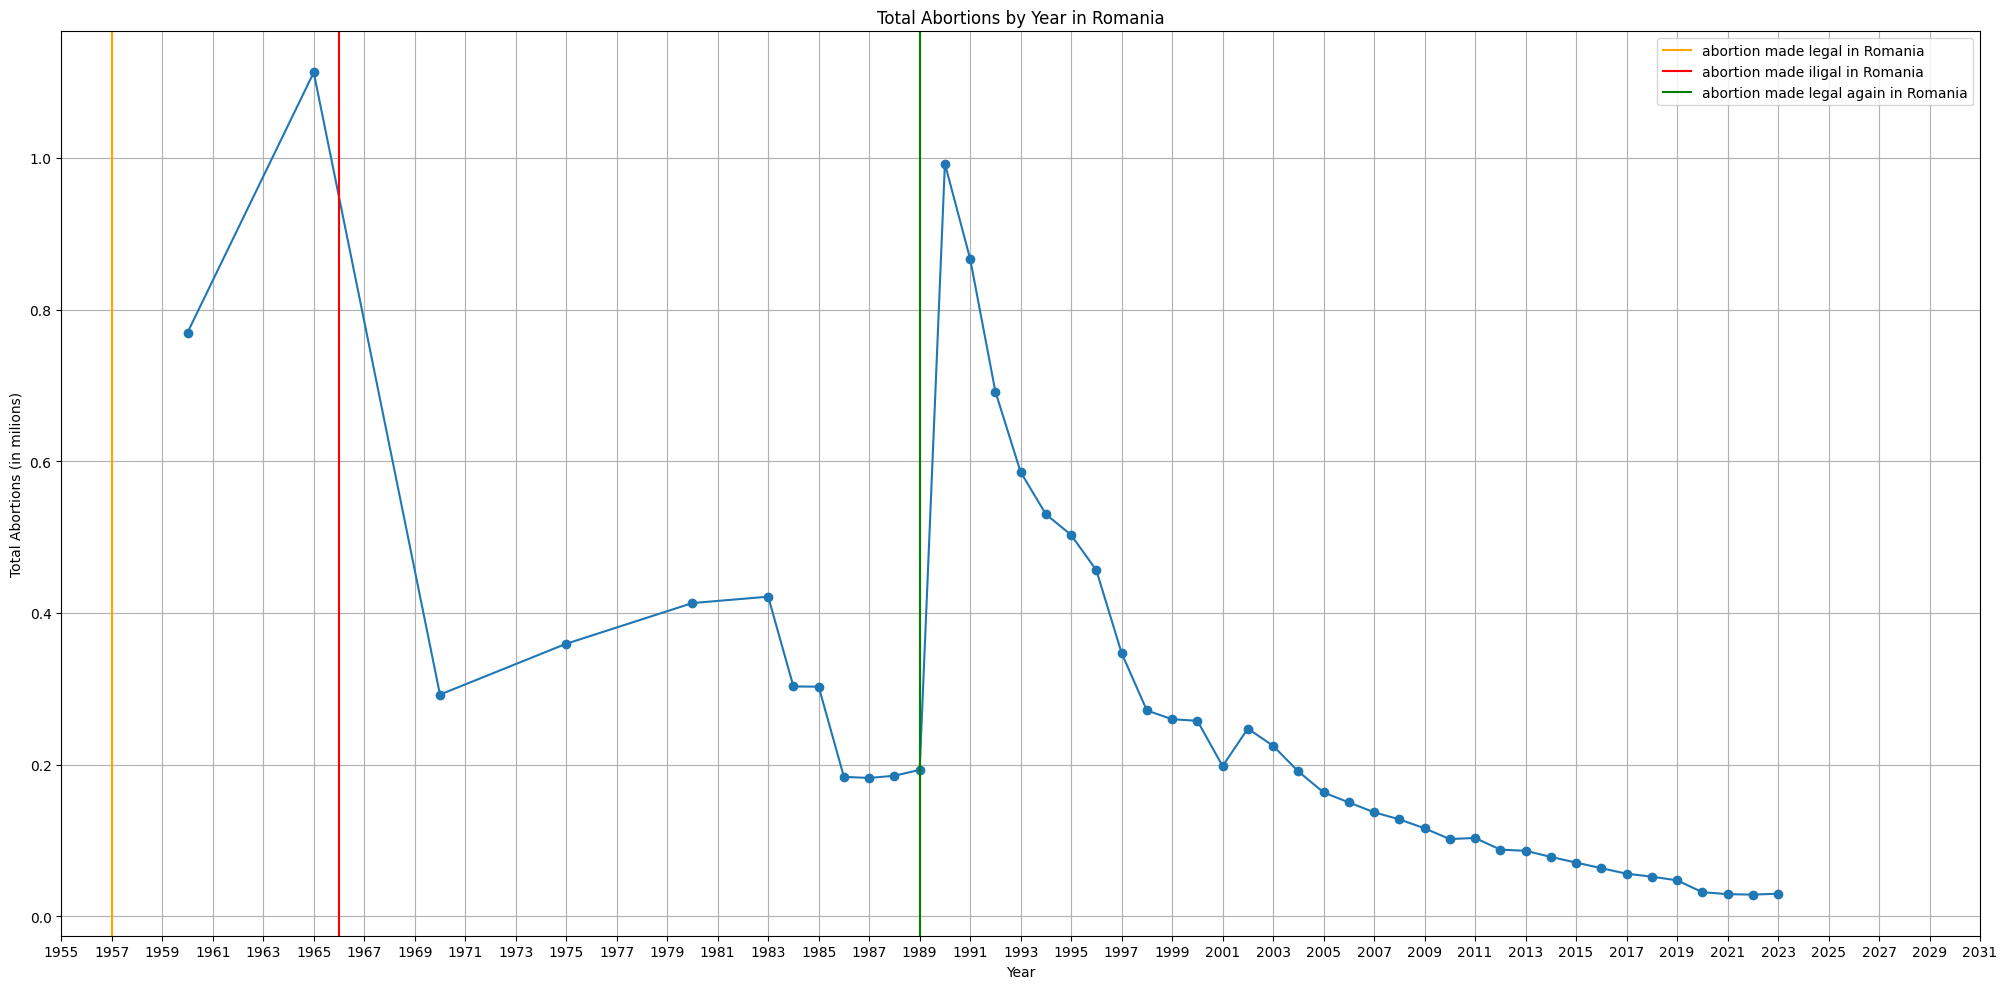

In [48]:
plt.figure(figsize=(20, 10))
plt.title('Total Abortions by Year in Romania')
plt.xlabel('Year')
plt.ylabel('Total Abortions (in milions)')
plt.plot(abortions_romania.TIME_PERIOD, abortions_romania['OBS_VALUE']/ 1_000_000, marker='o')
plt.tight_layout()
plt.grid(True)

plt.axvline(x = 1957, color = 'orange', label='abortion made legal in Romania')
plt.axvline(x = 1966, color = 'red', label='abortion made iligal in Romania')
plt.axvline(x = 1989, color = 'green', label='abortion made legal again in Romania')

years = abortions_romania['TIME_PERIOD']
plt.xticks(np.arange(years.min() - 5, years.max() + 10, 2))
plt.legend()
plt.show()

#### Observations:

1. Although data prior to 1957 is unavailable, we observe a rising trend in abortion rates from 1960 to 1965 — the year before abortion was criminalized.

2. In 1966, abortion was made illegal in Romania, leading to a sharp and sustained decline in recorded abortion rates. From that point onward, abortions were permitted only under strict medical exceptions. As a result, many women turned to unsafe, illegal procedures, and the ban is estimated to have caused the deaths of approximately 10,000 women. Due to the underground nature of these procedures, it is impossible to determine the exact number of illegal abortions that occurred between 1966 and 1989.

3. Following the fall of the Communist regime in 1989, abortion was legalized again. This led to a big increase in recorded abortion rates — not only because access was restored, but also because previously undocumented procedures could now be officially registered.


### 2.Poland

Abortion was first legalised in Poland in 1956 and after that it was made iligal in 1993, now let's see poland and also it's neibors arbortion number by years:

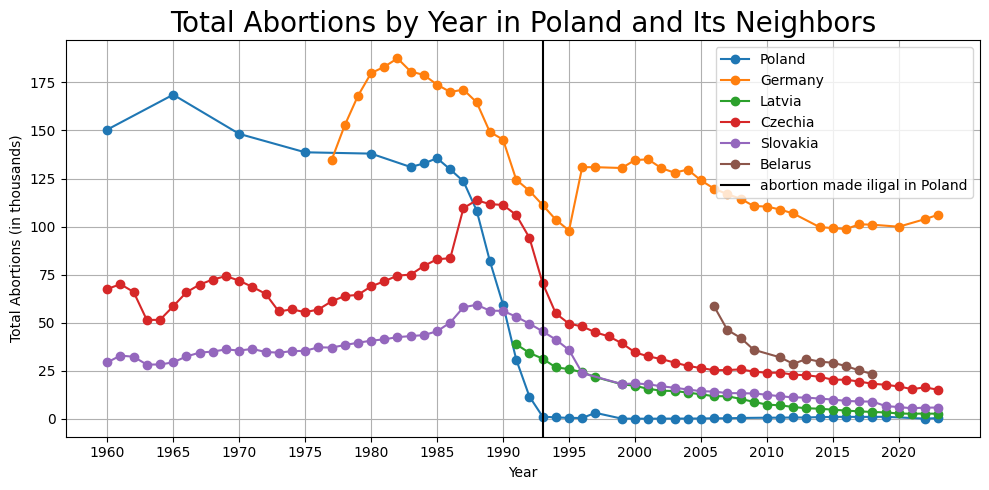

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

abortions_pl = eu_1[(eu_1['geo'] == 'Poland') & (eu_1['age'] == 'Total')]
abortions_gr = eu_1[(eu_1['geo'] == 'Germany') & (eu_1['age'] == 'Total')]
abortions_lt = eu_1[(eu_1['geo'] == 'Latvia') & (eu_1['age'] == 'Total')]
abortions_cz = eu_1[(eu_1['geo'] == 'Czechia') & (eu_1['age'] == 'Total')]
abortions_sl = eu_1[(eu_1['geo'] == 'Slovakia') & (eu_1['age'] == 'Total')]
abortions_bl = eu_1[(eu_1['geo'] == 'Belarus') & (eu_1['age'] == 'Total')]

plt.figure(figsize=(10, 5))
plt.title('Total Abortions by Year in Poland and Its Neighbors', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Total Abortions (in thousands)')

plt.plot(abortions_pl.TIME_PERIOD, abortions_pl['OBS_VALUE'] / 1_000, marker='o', label='Poland')
plt.plot(abortions_gr.TIME_PERIOD, abortions_gr['OBS_VALUE'] / 1_000, marker='o', label='Germany')
plt.plot(abortions_lt.TIME_PERIOD, abortions_lt['OBS_VALUE'] / 1_000, marker='o', label='Latvia')
plt.plot(abortions_cz.TIME_PERIOD, abortions_cz['OBS_VALUE'] / 1_000, marker='o', label='Czechia')
plt.plot(abortions_sl.TIME_PERIOD, abortions_sl['OBS_VALUE'] / 1_000, marker='o', label='Slovakia')
plt.plot(abortions_bl.TIME_PERIOD, abortions_bl['OBS_VALUE'] / 1_000, marker='o', label='Belarus')


plt.axvline(x = 1956, color = 'gray', label='abortion made ligal in Poland')
plt.axvline(x = 1993, color = 'black', label='abortion made iligal in Poland')

plt.tight_layout()
plt.grid(True)
plt.legend()
years = abortions_pl['TIME_PERIOD']
plt.xticks(np.arange(years.min(), years.max() + 1, 5))  # minor fix: +1 not +10
plt.show()

Alright so it does not seem to be any semnificative rise in the abortion rates of its neighbors when the law was passed

My previous observation might be wrong, the anti abortion agenda in Poland gained power in 1989 after the fall of Comunism in Poland <br>
In 1989 after Comunism fell, there were a lot of anti abortion laws implemented <br>
This movment started in Late 1970s – Early 1980, with a Solidarity Movement beeing started in 1980 by the the Catholic Church

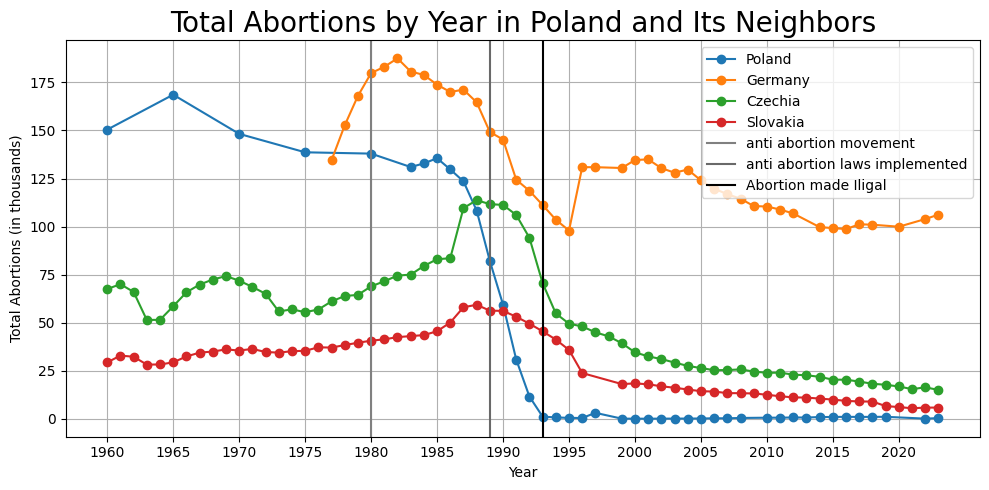

In [26]:
import numpy as np
import matplotlib.pyplot as plt

abortions_pl = eu_1[(eu_1['geo'] == 'Poland') & (eu_1['age'] == 'Total')]
abortions_gr = eu_1[(eu_1['geo'] == 'Germany') & (eu_1['age'] == 'Total')]
#abortions_lt = eu_1[(eu_1['geo'] == 'Latvia') & (eu_1['age'] == 'Total')]
abortions_cz = eu_1[(eu_1['geo'] == 'Czechia') & (eu_1['age'] == 'Total')]
abortions_sl = eu_1[(eu_1['geo'] == 'Slovakia') & (eu_1['age'] == 'Total')]
#abortions_bl = eu_1[(eu_1['geo'] == 'Belarus') & (eu_1['age'] == 'Total')]

plt.figure(figsize=(10, 5))
plt.title('Total Abortions by Year in Poland and Its Neighbors', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Total Abortions (in thousands)')

plt.plot(abortions_pl.TIME_PERIOD, abortions_pl['OBS_VALUE'] / 1_000, marker='o', label='Poland')
plt.plot(abortions_gr.TIME_PERIOD, abortions_gr['OBS_VALUE'] / 1_000, marker='o', label='Germany')
#plt.plot(abortions_lt.TIME_PERIOD, abortions_lt['OBS_VALUE'] / 1_000, marker='o', label='Latvia')
plt.plot(abortions_cz.TIME_PERIOD, abortions_cz['OBS_VALUE'] / 1_000, marker='o', label='Czechia')
plt.plot(abortions_sl.TIME_PERIOD, abortions_sl['OBS_VALUE'] / 1_000, marker='o', label='Slovakia')
#plt.plot(abortions_bl.TIME_PERIOD, abortions_bl['OBS_VALUE'] / 1_000, marker='o', label='Belarus')


plt.axvline(x = 1980, color = 'gray', label='anti abortion movement')
plt.axvline(x = 1989, color = 'dimgray', label='anti abortion laws implemented')
plt.axvline(x = 1993, color = 'black', label='Abortion made Iligal')

plt.tight_layout()
plt.grid(True)
plt.legend()
years = abortions_pl['TIME_PERIOD']
plt.xticks(np.arange(years.min(), years.max() + 1, 5))  # minor fix: +1 not +10
plt.show()

My intuition made me think, that people that can't do abortion in Poland anymore will go to the neighboring countries <br/>
But we have to take into account that Poland was not part of EU untill 2004 so to leave the country to get an abortion was very hard at that point.

## Q: Is there a corelation between the natality and the number of abortions?